# Fictitious play and reinforcement learning for computing equilibria
- Repeated & zero sum (stochastic) games
- Fictitious play (FP) (theory and implementation)
- Reinforcement Learning (RL) (theory and implementation)
- Experimental results comparing FP and RL
- Reinforcement Learning (RL) (theory and implementation) Experimental results comparing FP and RL


---

## Repeated & zero sum (stochastic) games

### Zero-sum game
**Situation**
- competing entities
- the result is an **advantage for one side** and an **equivalent loss** for the other (+5, -5)
- the net improvement in benefit of the whole game is zero.
    - Why? The advantage for one side is an equal loss for the other side.
    - This sum is zero.

#### Examples of games
- poker
- chess
- sports?
- bridge

### Repeated/Iterated game
- The same stage is played at each timeframe.
- Repeated number of repetitions of a base game (stage game)
- Same game, multiple games

#### Examples
- 2 gas stations offer competing prices
- Stage Game: The single-shot game played in each period.

### Stochastic/Markov games
- dynamic, multi-agent
- probabilities influence the transition to next state
- player strategies depend only on the current state

## Environment/Game description

Construct a game/environment which combines the above 3 characteristics.
In other words, it asks for a Competitive Markov Game, a two-player zero-sum game.


---


## Equilibria

### Nash equilibrium
- no player could gain more by changing their play strategy in a game.
- players choose their optimal strategy against the other players constant strategy
- does not guarantee overall best pay-off
- suboptimal for the group
- **Pareto inefficient**


### Pareto optimality/efficiency
- is a group/collective strategy
- every player is better off
- no players in worse situations (aka no punished players)


---


## Fictitious play - FP
- players keep track of the empirical frequency of opponent's past moves
    - i.e. player 2 played heads 60% of the time
    - choose best response against that average
- players adjust their strategies
- players assume opponent's strategy based on past historical frequency
- FP is guaranteed to converge to Nash equilibrium.
    - WHY?
    - Player 2, always chooses best/rational response against player 1's move
- FP approach can be systematically exploited!!!

**Refs**:
What's FP:
- https://en.wikipedia.org/wiki/Fictitious_play

FP Agent design:
- https://www.youtube.com/watch?v=_XIdEr-wtJg

FP Agent beliefs initialization:
- https://cse.unl.edu/~lksoh/Classes/CSCE475_875_Fall17/handouts/sup09.pdf


---


## Reinforcement Learning - RL
- Player explores actions and receives rewards or punishments - feedback
- Implemented via Q-learning or variants.
- Q-value updated on trial and error - exploration


---

## Implementation

### Environment 1. Simple Rock Paper Scissors - RPS

- Same stage played at each iteration.

### Environment 2. Beefy Rock-Paper-Scissors - BRPS

This is a high stakes Rock-Paper-Scissors game.

#### States
1. `State-i`: Initial state: Standard rewards (+1 win, -1 loss)
2. `State-n`: Next state: Rewards of previous state are doubled each time
3. We cap the states to a number to reduce the amount of memory for the agents

#### Stochastic transition (P)
- If there's a draw at any state, there's a P-chance to transition into next state in which rewards double.
- Otherwise, game stays in the same state.

#### Zero-Sum rewards (R)
- The sum of the rewards for Player 1 and Player 2 is always 0.
- One player wins, other loses: rewards for one is equal penalty for other.

#### Repeated
- Player play 10 rounds of the same game.

---

# DONE

- [x] imlement beefy RPS env
- [x] implement FP agent
- [x] implement q-learning agent
- [x] Move into notebook
- [x] implement **decaying** epsilon
- [x] break into modules

# TODO

- [ ] **implement minmax q-learning** - https://github.com/tocom242242/minimax_q_learning

- [ ] Convert into stochastic with limit cap
- [ ] extract metrics [scores, env.state, q-table, sigma, epsilon, diagrams, experiments, interpretations, self-plays]
- [ ] use petting zoo for RPS
- [ ] research - competitive grid world
- [ ] research - implement pong game (discrete actions)
- [ ] research - hunter-pray game gridworld
- [ ] research - implement multi-agent shooting game
- [ ] implement SARSA agent - https://www.geeksforgeeks.org/machine-learning/sarsa-reinforcement-learning/
- [ ] practical application ???
- [ ] evolutionary algorithms - research
- [ ] bomb difusal game/environment
- [ ] penalties game/environment


# Resources

READ THIS FIRST: https://lefkippos.ds.unipi.gr/modules/document/file.php/AI_IIT113/Lectures%205%20%26%206%20Agents-Interactions_Game_Theory.pdf

- Q-Learning (Pong) - https://courses.grainger.illinois.edu/ece448/sp2018/assignment4.html
- evolutionary algo - https://www.cs.vu.nl/~gusz/ecbook/Eiben-Smith-Intro2EC-Ch2.pdf
- evolutionary rl - https://github.com/RichardAragon/EvolutionaryReinforcementLearning
- paper to get games, metrics, algos - https://github.com/shiivashaakeri/Pong-Deep-QLearning/blob/main/Report.pdf
- q-learning tutorial - https://www.geeksforgeeks.org/machine-learning/q-learning-in-python/
- book implementations for RL - https://github.com/ShangtongZhang/reinforcement-learning-an-introduction
- RL taxonomy - https://github.com/bennylp/RL-Taxonomy
- OpenAI RL taxonomy - https://spinningup.openai.com/en/latest/spinningup/rl_intro2.html
- SARSA - https://github.com/linesd/tabular-methods/blob/master/algorithms/temporal_difference.py; https://www.geeksforgeeks.org/machine-learning/sarsa-reinforcement-learning/
- ALL RL ALGOS - https://github.com/FareedKhan-dev/all-rl-algorithms/blob/master/cheatsheet.md
- RL algorithms paper - https://arxiv.org/pdf/2209.14940
- minmax q-learning - https://github.com/tocom242242/minimax_q_learning/blob/master/minimax_q_learner.py; https://github.com/theevann/MinimaxQ-Learning
- Multi-Step Minimax Q-learning Algorithm for Two-Player Zero-Sum Markov Games - https://arxiv.org/abs/2407.04240
- Policies in MDPS and games - https://courses.cs.duke.edu/spring07/cps296.3/littman94markov.pdf
- **FLATLAND challenge** - https://gitlab.aicrowd.com/flatland/flatland; https://www.youtube.com/watch?v=cvkeWwDQr0A

---

# Environments

## 1. Rock-Paper-Scissors - RPS

To test the agents, we implement a simple Rock Paper Scissors - RPS environment. In each iteration, the agents play the same game - repeated.

### States
In its simple version, the same state is repeated in each iteration.

In its stochastic version, the state has a transition probability into the next state. In the next state, the rewards are doubled.

1. `State-i`: Initial state: Standard rewards (+1 win, -1 loss)
2. `State-n`: Next state: Rewards of previous state are doubled each time
3. We cap the states to a number to reduce the amount of memory for the agents

### Stochastic transition (P)
- If there's a draw at any state, there's a P-chance to transition into next state in which rewards double.
- Otherwise, game stays in the same state.

### Zero-Sum rewards (R)
- The sum of the rewards for Player 1 and Player 2 is always 0.
- One player wins, other loses: rewards for one is equal penalty for other.

In [12]:
import random

class RPS_environment():
    """
    Rock Paper Scissors environment - simple.
    """

    def __init__(self, payoff_matrix=None, stochastic=False, transition_prob=0.3, max_states=3):

        # Payoff Matrix: Player 1 rows, Player 2 cols
        # 0: Rock
        # 1: Paper
        # 2: Scissors
        # self.matrix = [
        #         # R  P  S
        #         [0, -1, 1],  # R
        #         [1, 0, -1],  # P
        #         [-1, 1, 0],  # S
        #         ]
        
        self.payoff_matrix = payoff_matrix
        self.stochastic = stochastic
        self.state = 0
        self.P = transition_prob
        self.max_states = max_states
        self.score1 = 0
        self.score2 = 0
        self.reward1 = 0
        self.reward2 = 0
        self.draws = 0

    def step(self, action1, action2):
        """
        Transition function:
        1. receive actions from players
        2. calculate rewards
        3. update state
        4. return information
        """

        reward1 = self.payoff_matrix[action1][action2]*(self.state+1)
        reward2 = -reward1

        self.update_score(reward1, reward2)
        self.update_reward(reward1, reward2)

        # Calculate transition
        if self.stochastic:
            if action1 == action2:
                if random.random() < self.P:
                    if self.state < self.max_states:
                        # We transition
                        self.state += 1
            else:
                self.reset()

        return self.state, reward1, reward2

    def update_score(self, reward1, reward2):
        """Keep scores of the agents."""
        if reward1>reward2:
            self.score1+=1
        elif reward2>reward1:
            self.score2+=1
        else:
            self.draws+=1

    def update_reward(self, reward1, reward2):
        """Reward counter for each agent."""
        self.reward1 += reward1
        self.reward2 += reward2

    def reset(self):
        """Winning condition reached."""
        self.state = 0

---

# Agents

## Fictitious play - FP agent

- This is a model based agent - tries to build a model of the environment to predict the best move.
- It has a memory of the previous plays of the opponent - tracks state changes.
- It tracks its opponents moves with a counter: `counts`
- It tracks a distribution for each of the opponent's moves: `sigma`
- In each round it plays the opposite move of the opponent: `best_move`
- This agent can get trapped into playing non-optimal moves.

In [104]:
class FictitiousPlayAgent():
    """
    Fictitious Play Agent: A model based agent.
    """

    def __init__(self, payoff_matrix):
        # Times a move has been played
                      #R #P #S
        self.counts = [1, 1, 1]

        # Probability distribution
                      #R #P #S
        self.sigma = [0, 0, 0]

        # Utility matrix
        self.rows = 3
        self.cols = 3
        self.payoff_matrix = payoff_matrix

    def action(self, opponent_action):
        """
        Calculate the best action and ACT.
        """
        if opponent_action is not None:
            self.update_counts(opponent_action)
            self.update_sigma(opponent_action)
            best_move = self.find_best_move()
        else:
            best_move = random.randint(0, 2)
        return best_move

    def update_counts(self, opponent_action):
        self.counts[opponent_action] += 1

    def update_sigma(self, opponent_action):
        for i in range(len(self.sigma)):
            self.sigma[i] = round(self.counts[i]/sum(self.counts), 3)

    def find_best_move(self):
        """
        Calculates utilities using distribution sigma and returns best move.
        """
        max_u = -float("inf")
        best_move = random.randint(0, 2)
        for i in range(self.rows):
            row_i_sum = sum([a*b for a, b in zip(self.payoff_matrix[i], self.sigma)])
            if row_i_sum > max_u:
                max_u = row_i_sum
                best_move = i

        return best_move

## Q-learning agent - simple

The simplest version of Q-learning algorithm.

This agent keep a table for each of its actions. It dcides on the next action using Bellman's equation:

Can get trapped and always select worst moves. Why? Because it does not take into account the opponent's move. In its worst case, all values in its `q_table` are all negative. This happens when during play, one of the action values drops bellow the threshold it can get increased by continuously getting a negative reward for its play. When that happens, this action will no longer be selected as the next action, unless it will be the maximum negative value. Even if it gets selected and played and the agent wins, the reward it will get, might not be enough to bring the value into positive state. In any case, the agent is trapped in playing the same move, the one with the greater value in its `q_table`. In other words, there's no guarantee it will converge to Nash equilibrium.

In [465]:
import numpy as np

class QLearning():
    """Generic Q-Learning algorightm."""

    def __init__(self, states=[0], actions=[0, 1, 2], epsilon_init=0.1):
        # Initialize Q-table
        self.q_table = {state: [0.0 for action in actions] for state in states}
        self.epsilon = epsilon_init
        self.alpha = 0.1
        self.gamma = 0.9
        self.action_space = actions

    def action(self, state):
        """
        Choose an action using the epsilon-greedy policy.
        """
        if np.random.rand() < self.epsilon:
            # Explore
            chosen_action = np.random.choice(self.action_space)
        else:
            # Exploit
            state_values = self.q_table[state]
            max_val = max(state_values)
            # If we have multiple max values, choose one randomnly
            best_action = [i for i, v in enumerate(state_values) if v == max_val]
            chosen_action = np.random.choice(best_action)

        return chosen_action
        
    def update_q_value(self, state, action, reward, next_state):
        """
        Update the Q-value using Bellman eq..
        """
        max_next_q = max(self.q_table[next_state])
        # TEmpoeral difference
        td_target = reward + self.gamma * max_next_q

        # New Q value
        self.q_table[state][action] += self.alpha * (td_target - self.q_table[state][action])

## Epsilon decay functions

To prevent the Q-learning agent from getting stuck in playing the same move - one with highest values Q-table - we introduce the `epsilon_threshold` variable. This variable determines the eploration vs exploitation boundary. Here we implement several epsilon decay function to be used in RL algorithms which utilize Bellman's equation.

### Linear epsilon decay

In this scenario, `epsilon` decays by a stable step which is subtracted in each iteration. This allows for a smooth exploration.

Text(0.5, 1.0, 'Linear Epsilon Decay')

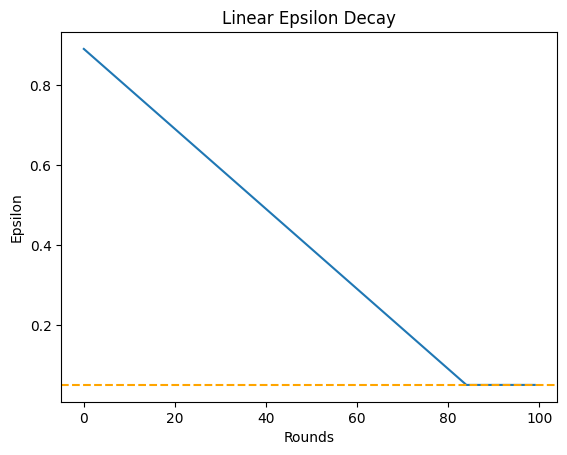

In [246]:
# Linear e
import numpy as np
import matplotlib.pyplot as plt


epsilon = 0.9
step = 0.01
data = []
rounds = 100
epsilon_threshold = 0.05 # Exploration limit

for i in range(rounds):
    if epsilon > epsilon_threshold:
        epsilon -= step
        data.append(round(epsilon, 3))
    else:
        data.append(data[-1])

plt.plot(range(100), data)
plt.xlabel("Rounds")
plt.ylabel("Epsilon")
plt.axhline(y=epsilon_threshold, color="orange", linestyle="--")
plt.title("Linear Epsilon Decay")

### Exponential epsilon decay

In this scenario, epsilon starts from a high value allowing the agent to explore, but then drops real quick transitioning in the exploitation phase.

Text(0.5, 1.0, 'Exponential Epsilon Decay')

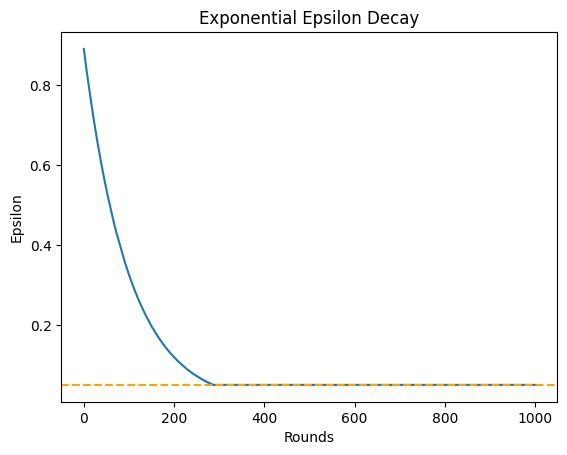

In [428]:
epsilon = 0.9
decay_factor = 0.99
data = []
rounds = 1000
epsilon_threshold = 0.05

for i in range(rounds):
    if epsilon > epsilon_threshold:
        epsilon *= decay_factor
        data.append(round(epsilon, 3))
    else:
        data.append(data[-1])

plt.plot(range(rounds), data)
plt.xlabel("Rounds")
plt.ylabel("Epsilon")
plt.axhline(y=epsilon_threshold, color="orange", linestyle="--")
plt.title("Exponential Epsilon Decay")

## Q-learning agent - decaying epsilon

This evolution of Q-learning agent uses the `epsilon_decay` variable, a value by which the exploration phase decays. Moreover, this implementation has an `epsilon_threshold` variable which prevents the agent from getting stuck in playing the same action from its `q_table` forcing it to play a random move instead. This technique, somewhat prevents the agent resulting in negative values in its `q_table`.

In [2]:
import numpy as np

class QLearning_decaying_epsilon():
    """
    Generic Q-Learning algorightm.
    INPUTS:
      states<list> - numbered env states starting from 0
      actions<list>- agent actions list starting from 0
      epsilon_init<float> - initial epsilon value
      epsilon_decay<float> - decay factor for epsilon value
      epsilon_decay_strategy<string> - how epsilon factor should decay: ["exp","lin]
      epsilon_threshold<float> - when should epsilon stop
    """

    def __init__(self, states=[0], actions=[0, 1, 2], epsilon_init=0.9, epsilon_decay=0.949, epsilon_decay_strategy="exp", epsilon_threshold=0.05):
        # Initialize Q-table
        self.q_table = {state: [0.0 for action in actions] for state in states}
        self.epsilon = epsilon_init
        self.epsilon_decay = epsilon_decay
        self.epsilon_decay_strategy = epsilon_decay_strategy
        self.epsilon_threshold = epsilon_threshold
        self.alpha = 0.1
        self.gamma = 0.9
        self.action_space = actions

    def action(self, state):
        """
        Choose an action using the epsilon-greedy policy.
        """
        if np.random.rand() < self.epsilon:
            # Explore
            chosen_action = np.random.choice(self.action_space)
        else:
            # Exploit
            state_values = self.q_table[state]
            max_val = max(state_values)
            # If we have multiple max values, choose one randomly
            best_action = [i for i, v in enumerate(state_values) if v == max_val]
            chosen_action = np.random.choice(best_action)

        self.decay_epsilon()

        return chosen_action

    def decay_epsilon(self):
        if self.epsilon > self.epsilon_threshold:
            if self.epsilon_decay_strategy == "exp":
                self.epsilon *= self.epsilon_decay
            elif self.epsilon_decay_strategy == "lin":
                self.epsilon -= self.epsilon_decay
        
    def update_q_value(self, state, action, reward, next_state):
        """
        Update the Q-value using Bellman eq..
        """
        max_next_q = max(self.q_table[next_state])
        # TEmpoeral difference
        td_target = reward + self.gamma * max_next_q

        # New Q value
        self.q_table[state][action] += self.alpha * (td_target - self.q_table[state][action])

## Nash Q-Learning

Extended Q-learning for adversarial multiagent environments. The algorithms assumes the opponent will always play rationally against it - will try to maximize its benefit. To counter that, it tracks moves and maintains a distribution `self.pi` over it's available actions. In each round, the logic solves a linear program which tries to **maximize the expected utility** `self.V`, but finding the values for the distribution `self.pi`.

This system is either solved via the simplex method by converting the problem into typical form, or can be solved via 2-phase simplex by introducing slack variables `s_i` to convert constraints to equalities and artificial variables `a_i` which will need to be eliminated in phase-1. In phase-2, we should be left only with the original coefficients of the variables `self.pi` which determin the distribution over the actions.

Ref: https://dl.acm.org/doi/pdf/10.5555/945365.964288

Instead of tracking only `Q(state, action)`, this algorithm tracks `Q(state, action ,opponent_action)`. This allows it to learn what to do against an opponent's action for each state.

The agent assumes the opponent will try to minimize its score. To counter, the agent tries to maximize that minimum possible score.

In Rock Paper Scissors, we have a distribution over the moves: (e.g., 33% Rock, 33% Paper, 33% Scissors).

### **Algorithm**

1. **Initialize**: Q table for all combinations of states*actions*op_actions
2. **Action**: Pick an action from the action space based on pi distribution
3. **Observe**: What the opponent chose and what reward you got
4. **Update**: Update the Q table for the pair of action,opp_action: `Q(a,o)=(1−α)Q(a,o)+α(reward+γ⋅Value)`

Essentially, we solve a linear program using `linprog()` from `scipy`. What does this problem say:

- Our `x` variables are the `pi` values which determine the action
- Objective value is `V`
- Coefficients of `x` are the `Q-table` values
- 

In [29]:
# Minimax Q-learning

class Minimax_QLearning():
    """
    Minimax Q-Learning.
    INPUTS:
      states<list> - numbered env states starting from 0
      actions<list>- agent actions list starting from 0
      epsilon_init<float> - initial epsilon value
      epsilon_decay<float> - decay factor for epsilon value
      epsilon_decay_strategy<string> - how epsilon factor should decay: ["exp","lin]
      epsilon_threshold<float> - when should epsilon stop
    """

    def __init__(self, states=[0], actions=[0, 1, 2], epsilon_init=0.9, epsilon_decay=0.949, epsilon_decay_strategy="exp", epsilon_threshold=0.05, alpha=0.1, gamma=0.9):
            # Q-table: state -> 2D matrix (our_actions x opp_actions)
            self.q_table = {state: np.zeros((len(actions), len(actions))) for state in states}
            
            # Policy table: state -> probability distribution over actions
            self.pi = {state: [1.0/len(actions) for _ in actions] for state in states}
            
            # State Value table: V(s)
            self.V = {state: 0.0 for state in states}
            
            self.epsilon = epsilon_init
            self.epsilon_decay = epsilon_decay
            self.epsilon_decay_strategy = epsilon_decay_strategy
            self.epsilon_threshold = epsilon_threshold
            self.alpha = alpha
            self.gamma = gamma
            self.action_space = actions

    def action(self, state):
        """
        Choose an action using the epsilon-greedy policy.
        """
        if np.random.rand() < self.epsilon:
            # Explore
            chosen_action = np.random.choice(self.action_space)
        else:
            # Exploit - based on pi distribution
            chosen_action = np.random.choice(self.action_space, p=self.pi[state])

        self.decay_epsilon()
        return chosen_action

    def decay_epsilon(self):
        if self.epsilon > self.epsilon_threshold:
            if self.epsilon_decay_strategy == "exp":
                self.epsilon *= self.epsilon_decay
            elif self.epsilon_decay_strategy == "lin":
                self.epsilon -= self.epsilon_decay

    def observe(self, state, action, opp_action):
        """
        Observe env.
        opp_action - opponent's action
        """

    def update_q_value(self, state, action, opp_action, reward, next_state):
            """
            Update Q(s, a, o) and solve the Linear Program for the new policy pi(s).
            """
            # 1. Update the specific Q-cell for the joint action
            # Q(s, a, o) = (1-alpha) * Q(s, a, o) + alpha * (reward + gamma * V(s'))
            # equivalent to Qnew=Qold+α*(Target−Qold)
            target = reward + self.gamma * self.V[next_state]
            self.q_table[state][action][opp_action] += self.alpha * (target - self.q_table[state][action][opp_action])
    
            # 2. Solve Linear Program to find the new V(s) and pi(s)
            self.V[state], self.pi[state] = self._solve_minimax(state)

    def _solve_minimax(self, state):
        """
        Uses Scipy to find the Nash Equilibrium of the current Q-matrix at this state.
        """
        Q = self.q_table[state]
        num_actions = len(self.action_space)

        # Objective function definition:
        # linprog minimizes c^T * x. We want to maximize V, so we minimize -V.
        # x vector: [p1, p2, p3, V]
        # Essentially we pass: c = min(-V)
        c = [0] * num_actions + [-1] # c = [0, 0, 0, -1] = coefficients of [piR, piP, piS, -V]
        
        # Build Inequality Constraints:
        # sum(pi * Q_col) >= V  :=>  V - sum(pi * Q_col) <= 0
        # We go down the row.
        A_ub = []
        for col in range(num_actions):
            constraint = [-Q[row][col] for row in range(num_actions)] + [1]
            A_ub.append(constraint)

        # RHS here is zeros since we move V to the left, above
        b_ub = [0] * num_actions
        
        # Build Equality Constraint:
        # sum(pi) = 1 :=> pi1 + pi2 + pi3 + 0V = 1
        A_eq = [[1] * num_actions + [0]]
        # RHS of equality constraint is 1
        b_eq = [1]

        # Bounds: pi in [0, 1], V is unrestricted (None)
        bounds = [(0, 1)] * num_actions + [(None, None)]

        res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method="highs")

        if res.success:
            new_pi = res.x[:num_actions] # new pi distribution values
            # To ensure no precision errors lead to negative probabilities, we convert small numbers to zeroes
            new_pi = np.maximum(new_pi, 0)
            # Calculate new pi distribution values
            new_pi /= np.sum(new_pi)
            # Objective value
            new_V = res.x[-1]
            return new_V, new_pi
        else:
            return self.V[state], self.pi[state] # Fallback to old values

---

# Metrics


## Regret
To prove the performance of the agent, we track its regret in each round. In the RPS scenario, the regret for each agent is the opposite of its cummulative reward from each round:

```python
cum_reward1 += reward1
cum_reward2 += reward2
regret_history1.append(-cum_reward1)
regret_history2.append(cum_reward2)
```
### Interpretation

**Linear Growth**
This is the worst case scenario, the agent kept loosing each round and its increased at a steady angle. The agent is making the same mistakes in each round and fails to learn the opponent's moves.

**Flattened**
Perhaps, the line goes up early, as the agent explores, but then flattens out. This means the agent has learned an optimal strategy, against its opponent, and is not exploiting it. It is no longer accumulating regret.

**Negative slope**
If regret goes down, the agent is actively exploiting its opponent's weakness. In each round the agent plays the optinal strategy against its opponent, thus we have Nash equilibrium.

# Scenarios

## FP self-play

In [248]:
def fp_self_play(rounds):
    env = RPS_environment(
        payoff_matrix=[
                 # R  P  S
                 [0, -1, 1],  # R
                 [1, 0, -1],  # P
                 [-1, 1, 0],  # S
        ]
    )

    # Row player
    agent1 = FictitiousPlayAgent(
            [
                 #R  P  S
                [0, -1, 1],  # R
                [1, 0, -1],  # P
                [-1, 1, 0],  # S
            ]
        )

    # Column player
    agent2 = FictitiousPlayAgent(
            [
                #R  P  S
                [0, 1, -1],  # R
                [-1, 0, 1],  # P
                [1, -1, 0],  # S
            ]
        )

    # Initializer
    last_act2 = None
    last_act1 = None

    env.reset()

    for i in range(rounds):
        curr_act1 = agent1.action(last_act2)
        curr_act2 = agent2.action(last_act1)

        env.step(curr_act1, curr_act2)

        last_act1 = curr_act1
        last_act2 = curr_act2

    print(f"Agent 1\ncounts: {agent1.counts}\nsigma: {agent1.sigma}\nScore: {env.score1}\nTotal reward: {env.reward1}")
    print("----------------")
    print(f"Agent 2\ncounts: {agent2.counts}\nsigma: {agent2.sigma}\nScore: {env.score2}\nTotal reward: {env.reward2}")
    print(f"Draws: {env.draws}")

In [249]:
fp_self_play(100)

Agent 1
counts: [1, 34, 67]
sigma: [0.01, 0.333, 0.657]
Score: 0
Total reward: -34
----------------
Agent 2
counts: [34, 1, 67]
sigma: [0.333, 0.01, 0.657]
Score: 34
Total reward: 34
Draws: 66


## FP vs Q-learning simple

In [395]:
def fp_vs_qlearning(rounds):
    
    env = RPS_environment(
        payoff_matrix=[
                 # R  P  S
                 [0, -1, 1],  # R
                 [1, 0, -1],  # P
                 [-1, 1, 0],  # S
        ]
    )

    # Row agent
    agent1 = FictitiousPlayAgent(
            [
                 #R  P  S
                [0, -1, 1],  # R
                [1, 0, -1],  # P
                [-1, 1, 0],  # S
            ]
        )

    agent2 = QLearning(epsilon_init=0.4)

    # Initializer
    last_act2 = None

    env.reset()

    for i in range(rounds):
        curr_env_state = env.state

        # Register actions
        curr_act1 = agent1.action(last_act2)
        curr_act2 = agent2.action(curr_env_state) # pass curr env state

        # Step the environment
        next_env_state, reward1, reward2 = env.step(curr_act1, curr_act2)

        # RL agent learns
        agent2.update_q_value(curr_env_state, curr_act2, reward2, next_env_state)

        last_act2 = curr_act2

    print(f"FP\ncounts: {agent1.counts}\nsigma: {agent1.sigma}\nScore: {env.score1}\nTotal reward: {env.reward1}")
    print("------------")
    print(f"Q-learning\nq_table: {agent2.q_table}\nScore: {env.score2}\nTotal reward: {env.reward2}")
    print(f"Draws: {env.draws}")

In [396]:
fp_vs_qlearning(100)

FP
counts: [37, 34, 31]
sigma: [0.363, 0.333, 0.304]
Score: 30
Total reward: -10
------------
Q-learning
q_table: {0: [0.4737487042586635, 0.2854262870400299, 0.8060943997284843]}
Score: 40
Total reward: 10
Draws: 30


## FP vs Q-learning decaying epsilon

In [17]:
def fp_vs_qlearning_decaying_epsilon(rounds):
    
    env = RPS_environment(
        payoff_matrix=[
                 # R  P  S
                 [0, -1, 1],  # R
                 [1, 0, -1],  # P
                 [-1, 1, 0],  # S
        ]
    )

    # Row agent
    agent1 = FictitiousPlayAgent(
            [
                 #R  P  S
                [0, -1, 1],  # R
                [1, 0, -1],  # P
                [-1, 1, 0],  # S
            ]
        )

    agent2 = QLearning_decaying_epsilon(epsilon_init=0.9, epsilon_decay=0.99, epsilon_decay_strategy="exp", epsilon_threshold=0.1)

    # Initializer
    last_act2 = None

    env.reset()

    for i in range(rounds):
        curr_env_state = env.state

        # Register actions
        curr_act1 = agent1.action(last_act2)
        curr_act2 = agent2.action(curr_env_state) # pass curr env state

        # Step the environment
        next_env_state, reward1, reward2 = env.step(curr_act1, curr_act2)

        # RL agent learns
        agent2.update_q_value(curr_env_state, curr_act2, reward2, next_env_state)

        last_act2 = curr_act2

    print(f"FP\ncounts: {agent1.counts}\nsigma: {agent1.sigma}\nScore: {env.score1}\nTotal reward: {env.reward1}")
    print("------------")
    print(f"Q-learning\nq_table: {agent2.q_table}\nScore: {env.score2}\nTotal reward: {env.reward2}")
    print(f"Draws: {env.draws}")


In [463]:
fp_vs_qlearning_decaying_epsilon(1000)

FP
counts: [330, 328, 344]
sigma: [0.329, 0.327, 0.343]
Score: 247
Total reward: -31
------------
Q-learning
q_table: {0: [0.3180103178061194, 0.046365463948615855, 0.2918325401259797]}
Score: 278
Total reward: 31
Draws: 475


## Q-learning decaying epsilon vs Nash Q-Learning

In [49]:
import numpy as np
from scipy.optimize import linprog

def qlearning_vs_minimax_q(rounds):

    # Init metrics
    regret_history_agent1 = []
    regret_history_agent2 = []
    cum_reward1 = 0
    cum_reward2 = 0
    
    # Setup environment
    env = RPS_environment(
        payoff_matrix=[
            [0, -1, 1],  # R
            [1, 0, -1],  # P
            [-1, 1, 0],  # S
        ]
    )

    # Agent 1: Minimax-Q (Nash) - Row Player
    agent1 = Minimax_QLearning(epsilon_init=0.9, epsilon_decay=0.99, epsilon_decay_strategy="exp", epsilon_threshold=0.1)

    # Agent 2: Standard Q-Learning - Column Player
    agent2 = QLearning_decaying_epsilon(epsilon_init=0.9, epsilon_decay=0.99, epsilon_decay_strategy="exp", epsilon_threshold=0.1)

    env.reset()

    for i in range(rounds):
        curr_state = env.state

        # 1. Get Actions
        act1 = agent1.action(curr_state)
        act2 = agent2.action(curr_state)

        # 2. Step Environment
        next_state, r1, r2 = env.step(act1, act2)

        # 2.5 Update metrics
        cum_reward1 += r1
        cum_reward2 += r2
        regret_history_agent1.append(-cum_reward1)
        regret_history_agent2.append(-cum_reward2)

        # 3. Update Minimax-Q (Requires BOTH actions)
        agent1.update_q_value(curr_state, act1, act2, r1, next_state)

        # 4. Update Standard Q-Learning (Only requires its own action)
        agent2.update_q_value(curr_state, act2, r2, next_state)

    # Final Reporting
    print(f"Minimax-Q (Nash)\nScore: {env.score1}\nTotal reward: {env.reward1}")
    print(f"V(s=0): {agent1.V[0]:.4f}")
    print(f"Policy(s=0): {np.round(agent1.pi[0], 3)}")
    print("------------")
    print(f"Standard Q-learning\nScore: {env.score2}\nTotal reward: {env.reward2}")
    print(f"Q-table(s=0): {np.round(agent2.q_table[0], 3)}")
    print("------------")
    print(f"Draws: {env.draws}")

In [48]:
qlearning_vs_minimax_q(100)

Minimax-Q (Nash)
Score: 32
Total reward: -7
V(s=0): -0.0183
Policy(s=0): [0.343 0.299 0.358]
------------
Standard Q-learning
Score: 39
Total reward: 7
Q-table(s=0): [0.302 0.3   0.47 ]
------------
Draws: 29
